In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
print("Dataset Shape:", df.shape)
print("\nDataset Information:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (891, 15)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

First 5 rows:
   survived 

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 107


In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)

/tmp/ipykernel_61629/589249267.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [ ]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

/tmp/ipykernel_61629/3423300980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [ ]:
if df['deck'].isnull().sum() / len(df) > 0.5:
    df.drop('deck', axis=1, inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [ ]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\nOutliers in {column}: {len(outliers)}")

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

In [ ]:

numerical_cols = ['age', 'fare']
for col in numerical_cols:
    df = handle_outliers(df, col)


Outliers in age: 27

Outliers in fare: 102


In [ ]:

df['sex'] = df['sex'].str.lower()

In [ ]:
# Univariate Analysis
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         survived      pclass         age       sibsp       parch        fare
count  775.000000  775.000000  775.000000  775.000000  775.000000  775.000000
mean     0.412903    2.246452   29.363123    0.529032    0.420645   26.593137
std      0.492674    0.853574   13.211598    0.990326    0.840565   22.873099
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   21.000000    0.000000    0.000000    8.050000
50%      0.000000    3.000000   28.000000    0.000000    0.000000   15.900000
75%      1.000000    3.000000   36.000000    1.000000    1.000000   34.197900
max      1.000000    3.000000   58.500000    8.000000    6.000000   73.419750


In [ ]:

print("\nSkewness:")
print(df.select_dtypes(include=[np.number]).skew())
print("\nKurtosis:")
print(df.select_dtypes(include=[np.number]).kurtosis())


Skewness:
survived    0.354483
pclass     -0.494767
age         0.211495
sibsp       3.036078
parch       2.613347
fare        1.097576
dtype: float64

Kurtosis:
survived    -1.879198
pclass      -1.449724
age          0.004330
sibsp       12.608666
parch        8.837563
fare        -0.190482
dtype: float64


In [ ]:

for column in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nFrequency distribution for {column}:")
    print(df[column].value_counts())
    print(f"Percentage distribution for {column}:")


Frequency distribution for sex:
sex
male      483
female    292
Name: count, dtype: int64
Percentage distribution for sex:

Frequency distribution for embarked:
embarked
S    562
C    155
Q     58
Name: count, dtype: int64
Percentage distribution for embarked:

Frequency distribution for class:
class
Third     401
First     210
Second    164
Name: count, dtype: int64
Percentage distribution for class:

Frequency distribution for who:
who
man      443
woman    250
child     82
Name: count, dtype: int64
Percentage distribution for who:

Frequency distribution for embark_town:
embark_town
Southampton    560
Cherbourg      155
Queenstown      58
Name: count, dtype: int64
Percentage distribution for embark_town:

Frequency distribution for alive:
alive
no     455
yes    320
Name: count, dtype: int64
Percentage distribution for alive:


In [17]:
print(df[column].value_counts(normalize=True) * 100)

alive
no     58.709677
yes    41.290323
Name: proportion, dtype: float64


In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


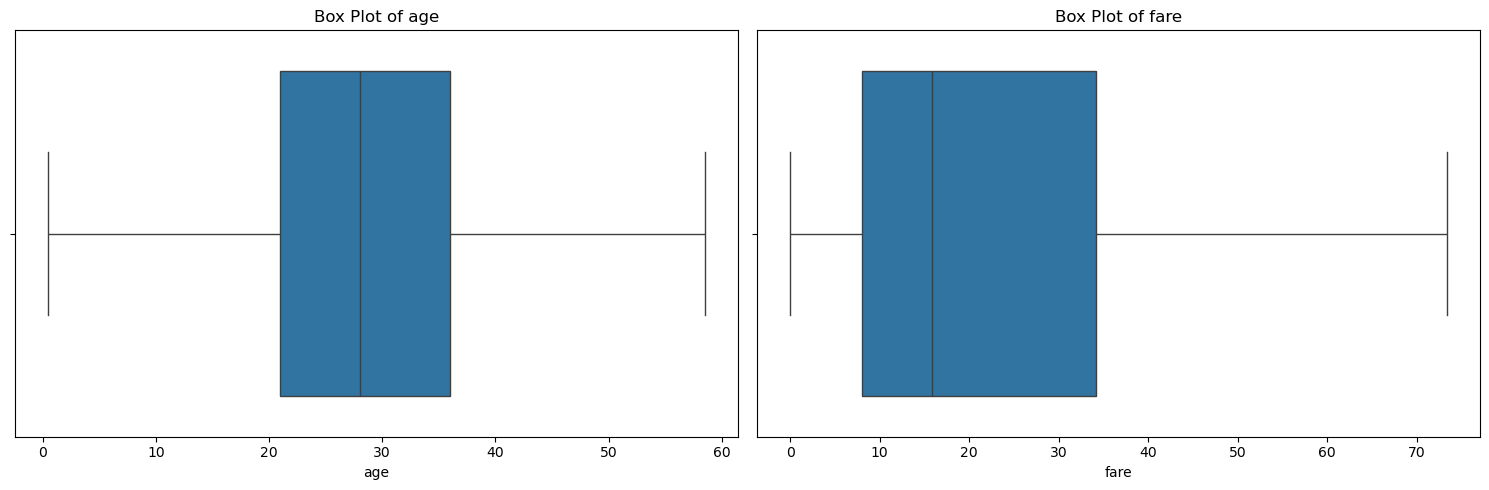

In [ ]:

plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.savefig('numerical_boxplots.png')

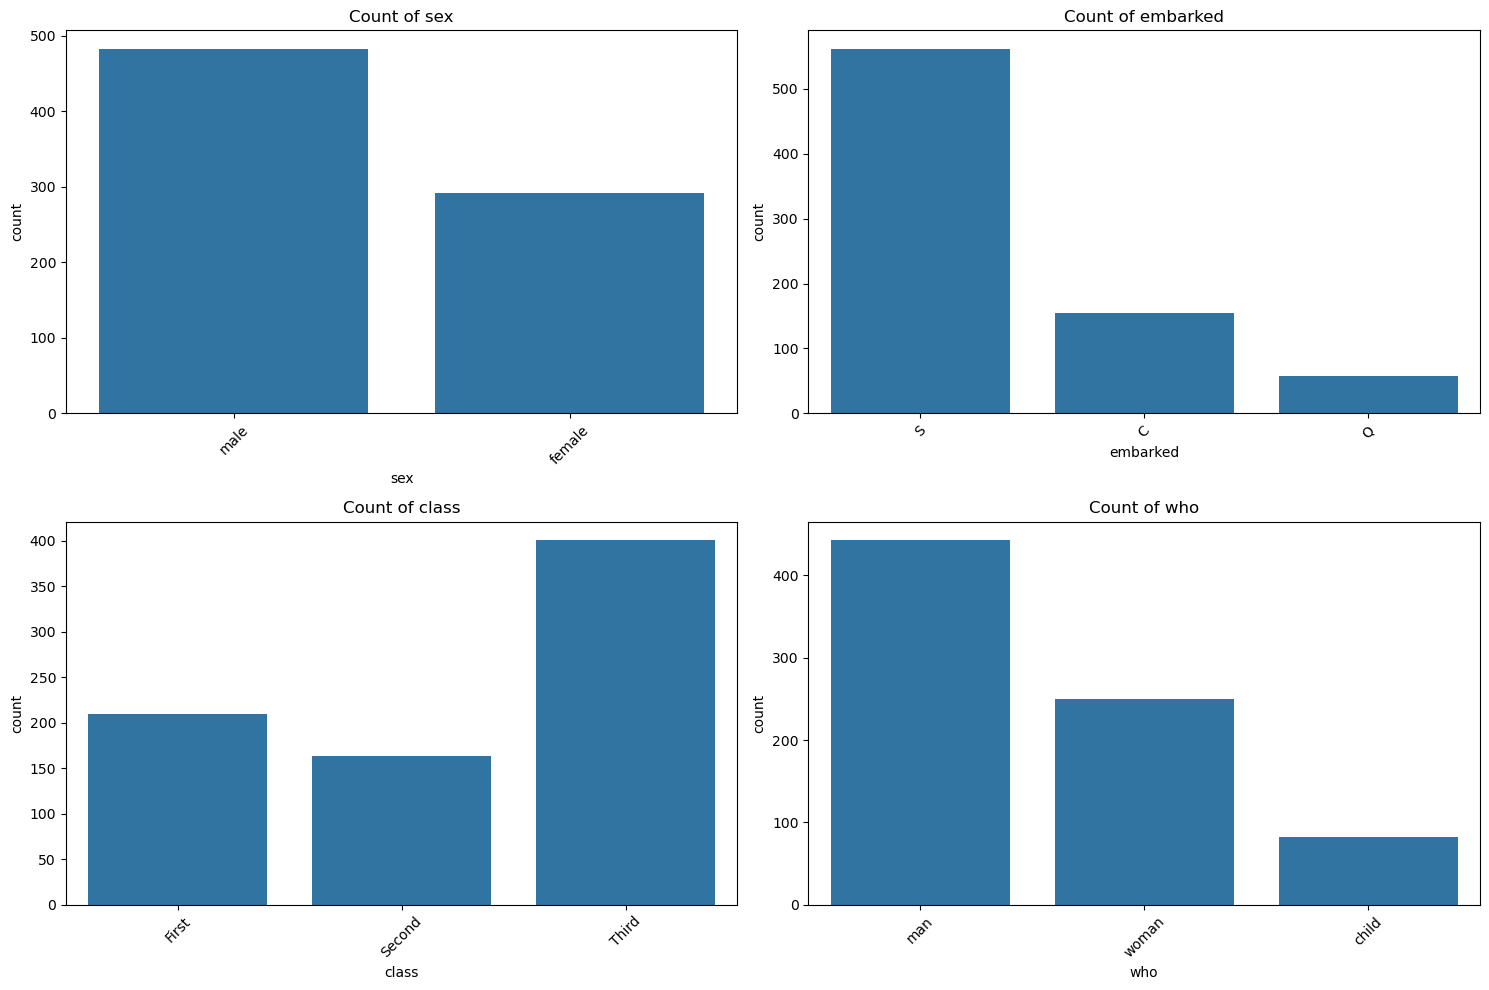

In [ ]:

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_cols[:4]): 
    plt.subplot(2, 2, i+1)
    sns.countplot(x=column, data=df)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('categorical_counts.png')

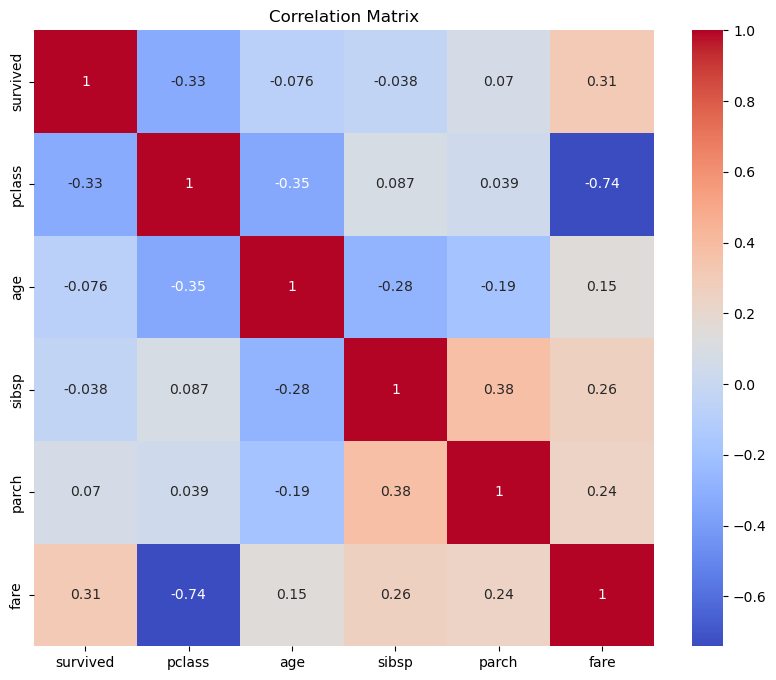

In [ ]:

plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')


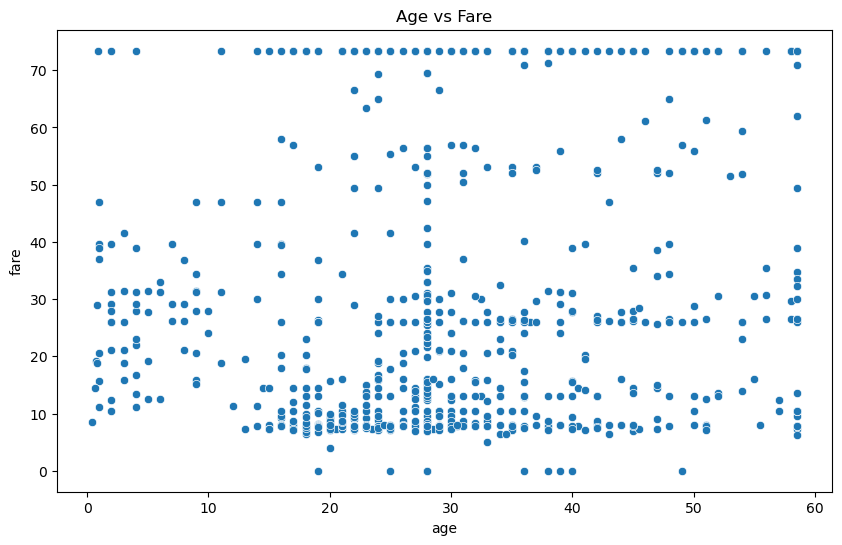

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', data=df)
plt.title('Age vs Fare')
plt.savefig('age_vs_fare.png')

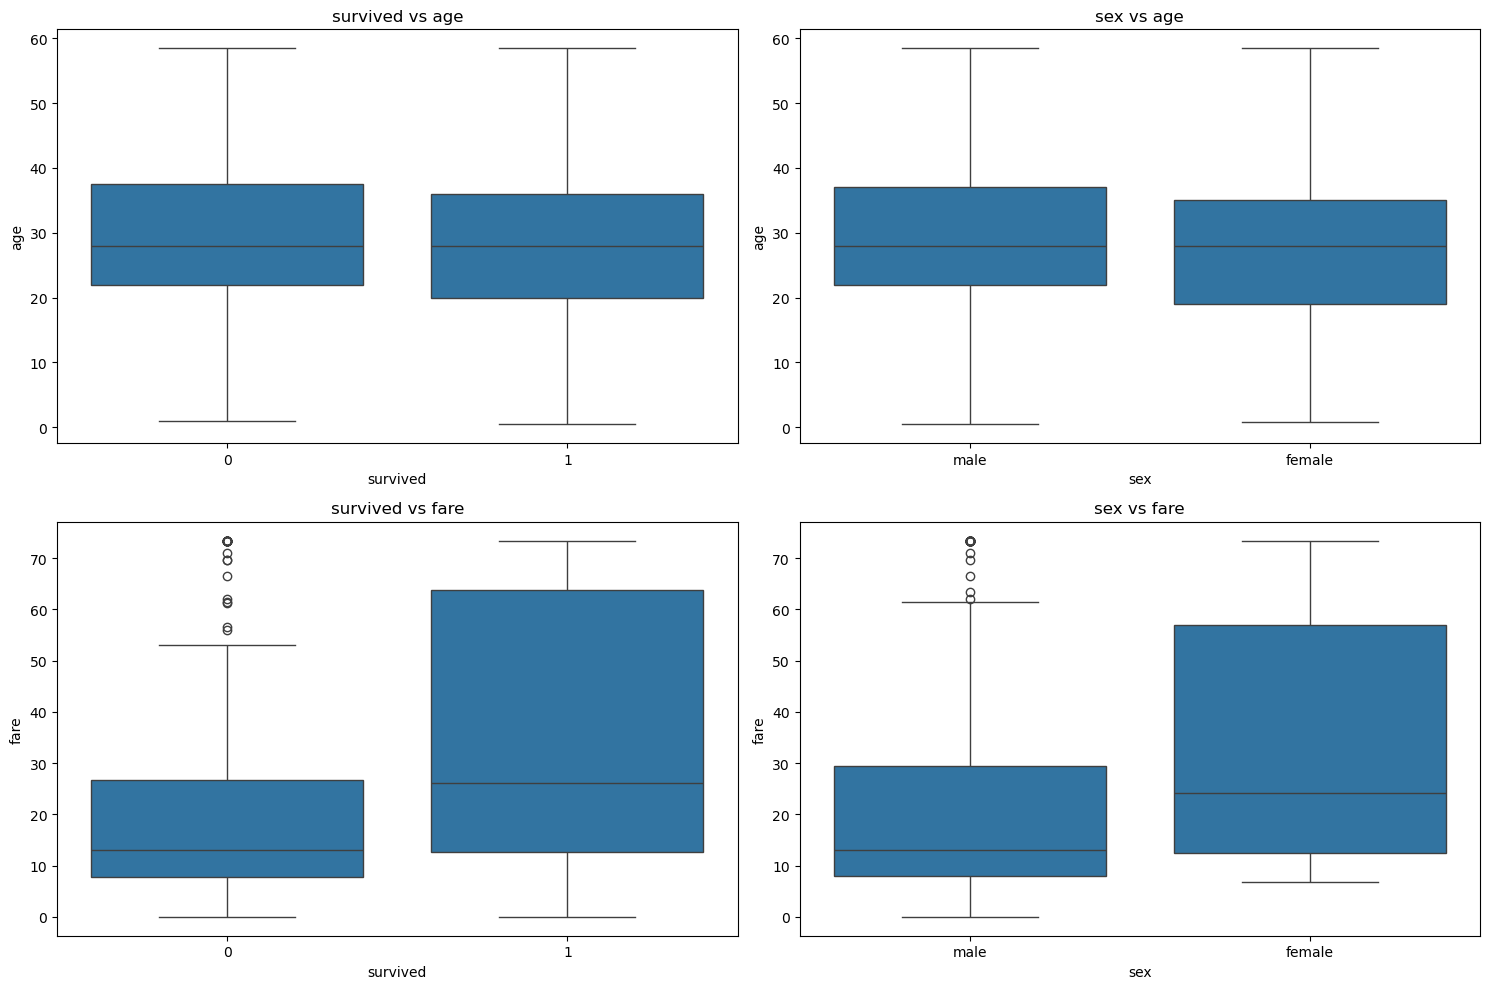

In [ ]:

plt.figure(figsize=(15, 10))
for i, num_col in enumerate(numerical_cols):
    for j, cat_col in enumerate(['survived', 'sex']):
        plt.subplot(2, 2, i*2+j+1)
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{cat_col} vs {num_col}')
plt.tight_layout()
plt.savefig('categorical_vs_numerical.png')

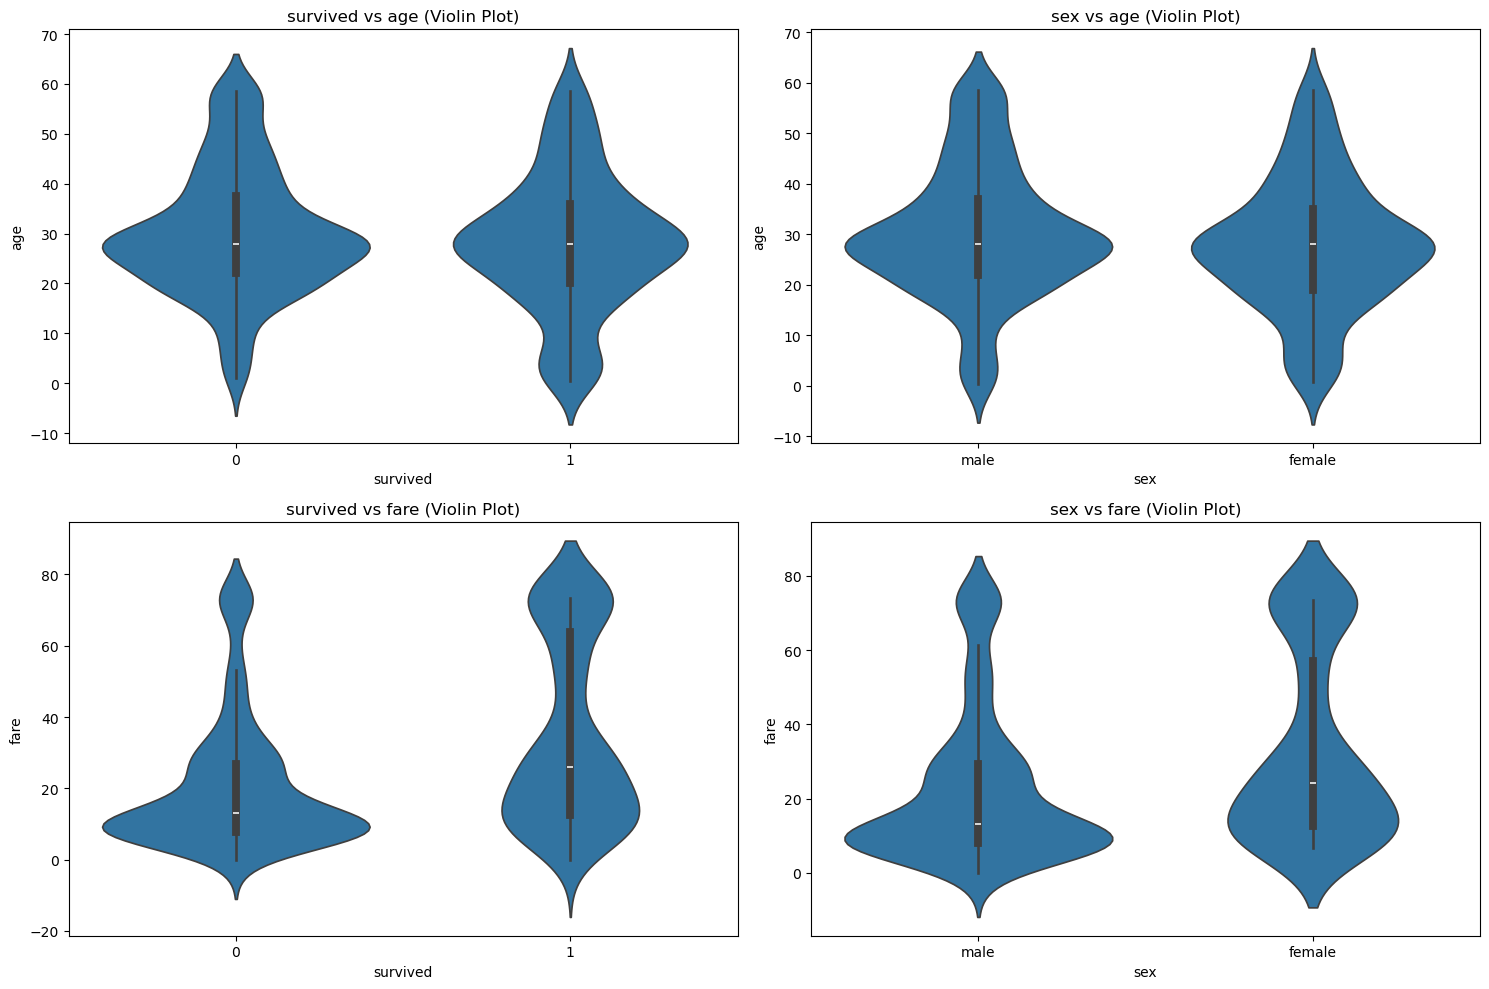

In [ ]:

plt.figure(figsize=(15, 10))
for i, num_col in enumerate(numerical_cols):
    for j, cat_col in enumerate(['survived', 'sex']):
        plt.subplot(2, 2, i*2+j+1)
        sns.violinplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{cat_col} vs {num_col} (Violin Plot)')
plt.tight_layout()
plt.savefig('violin_plots.png')

<Figure size 1200x1000 with 0 Axes>

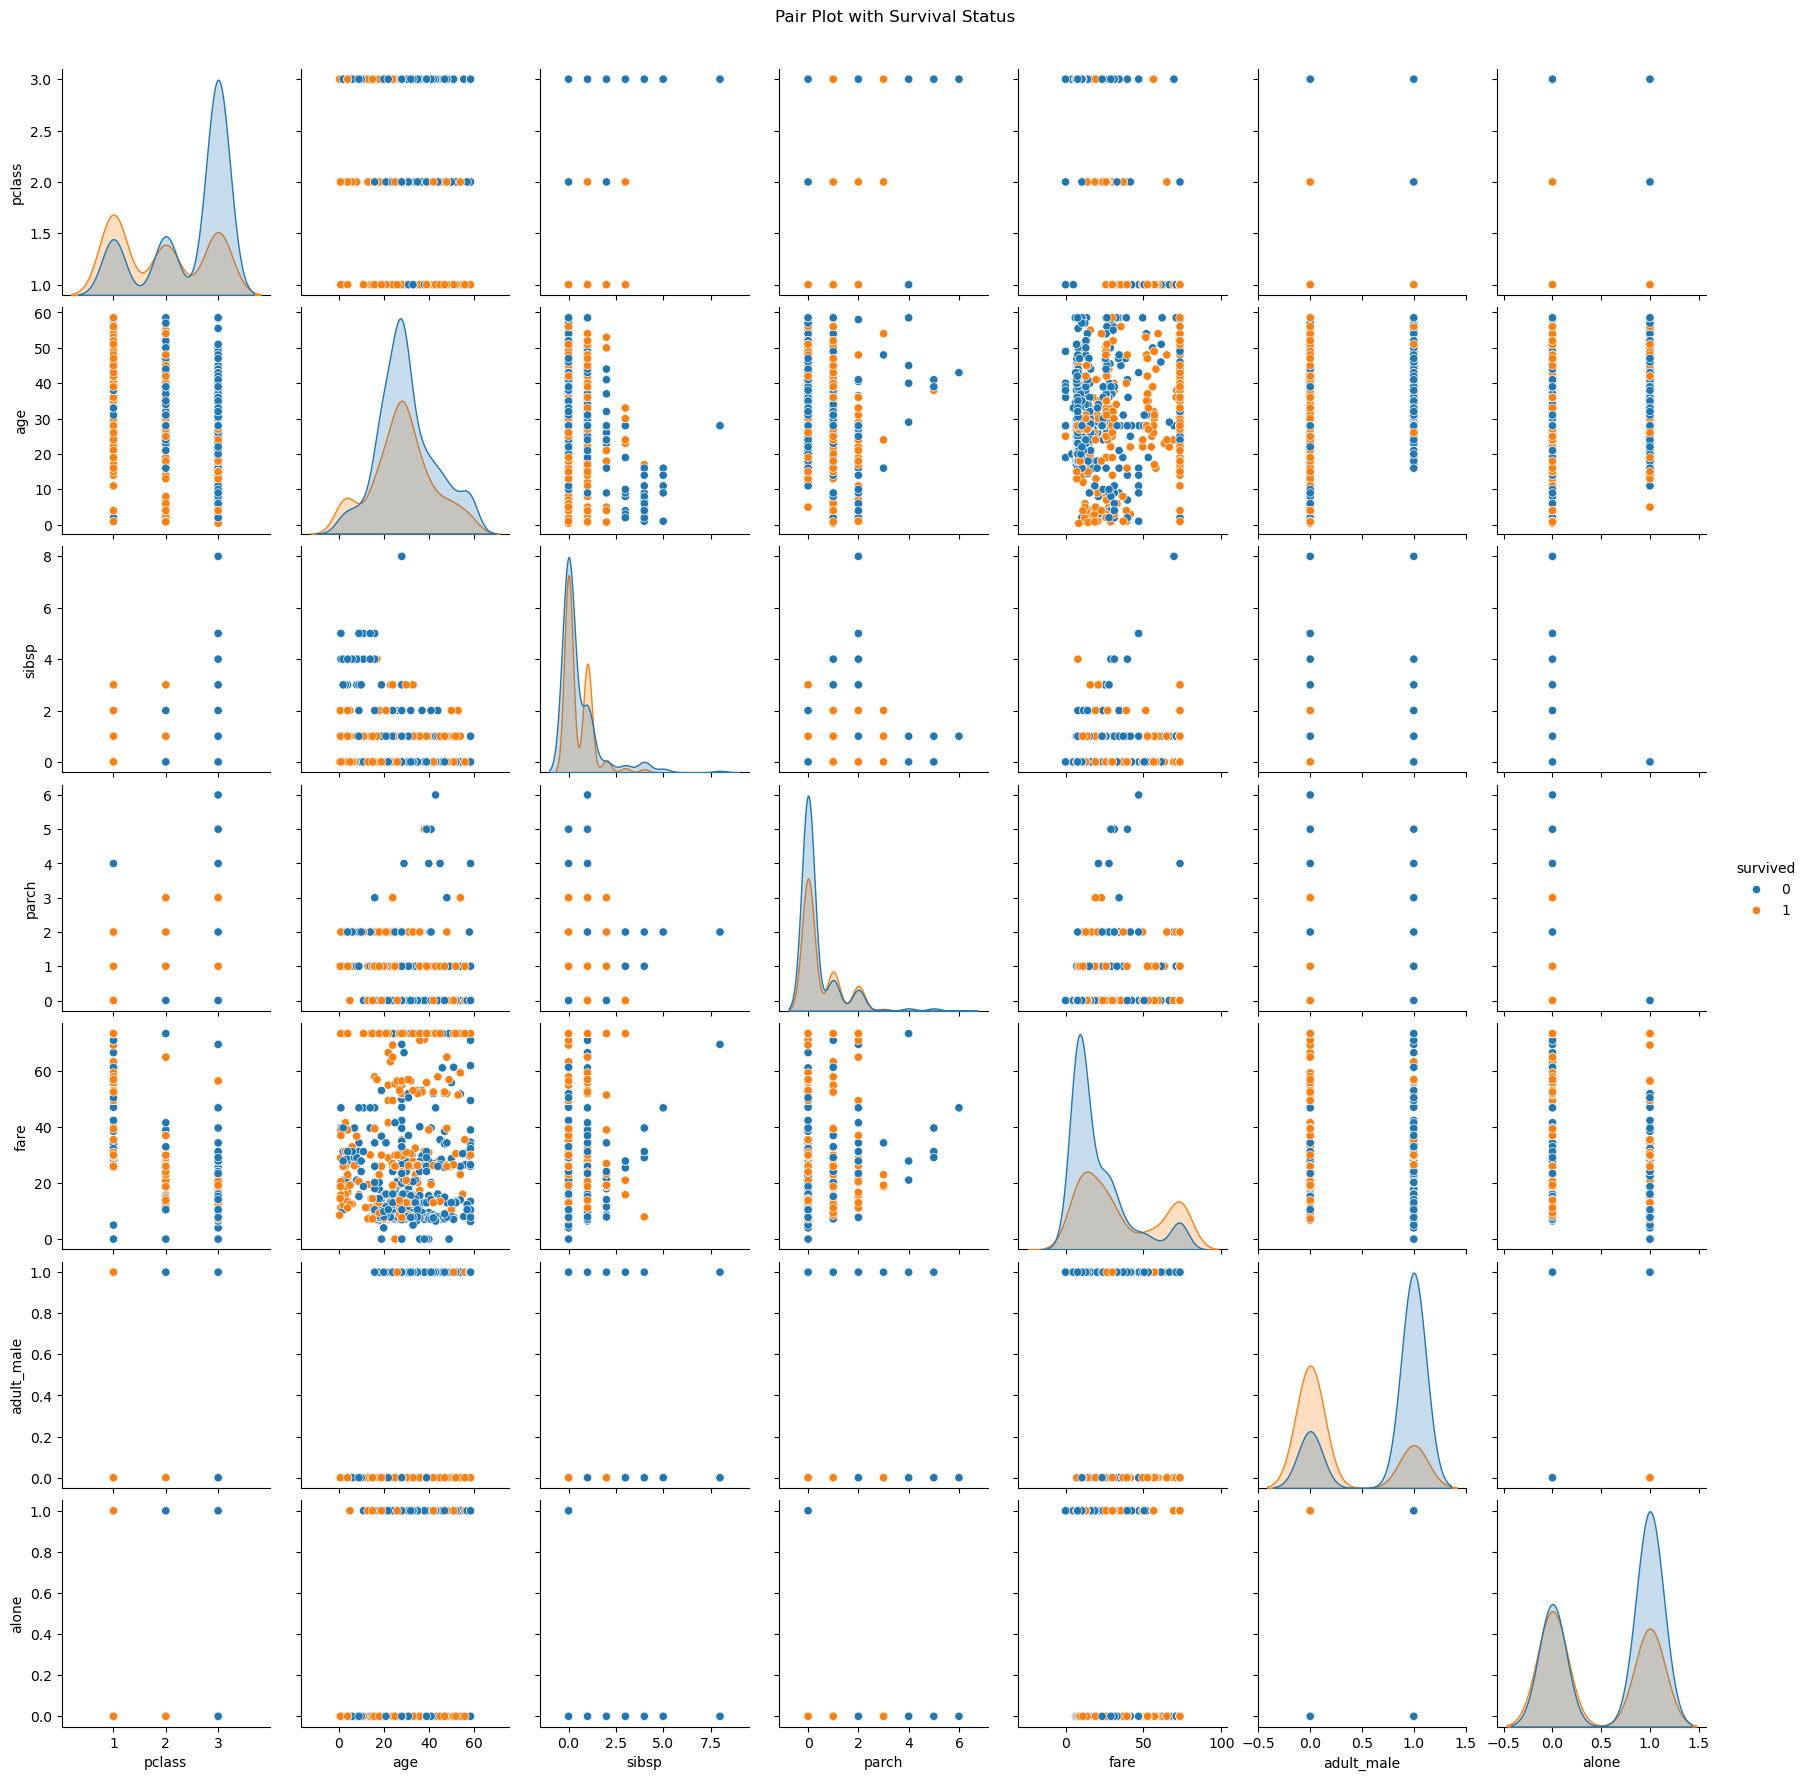

In [ ]:

plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='survived')
plt.suptitle('Pair Plot with Survival Status', y=1.02)
plt.savefig('pair_plot.png')

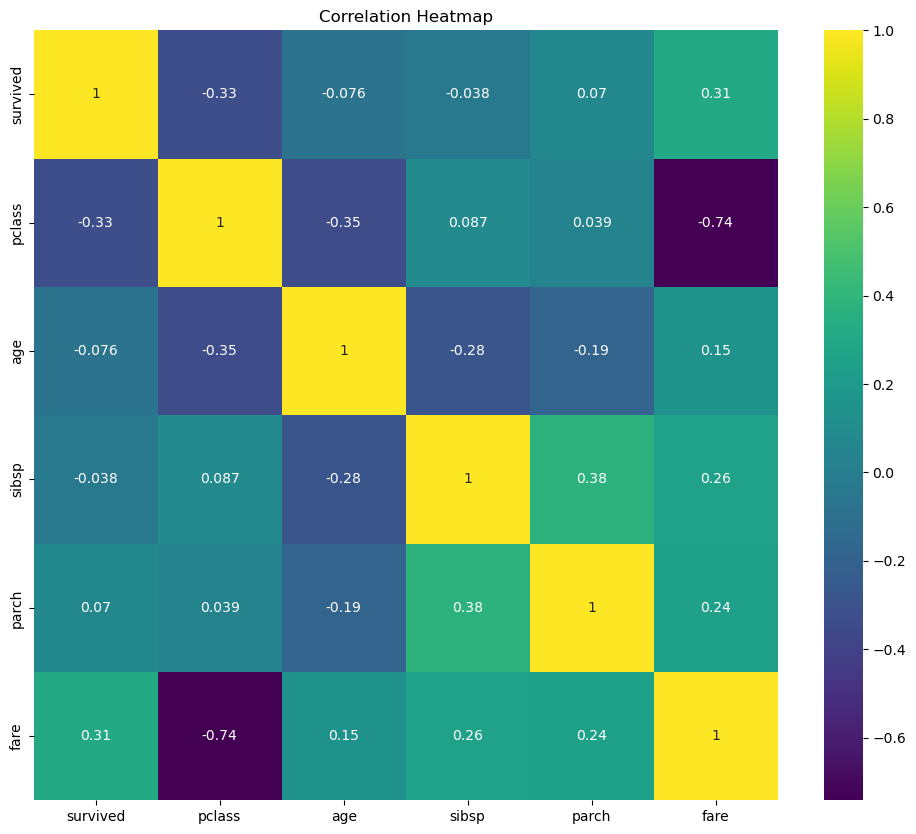

In [ ]:

plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')

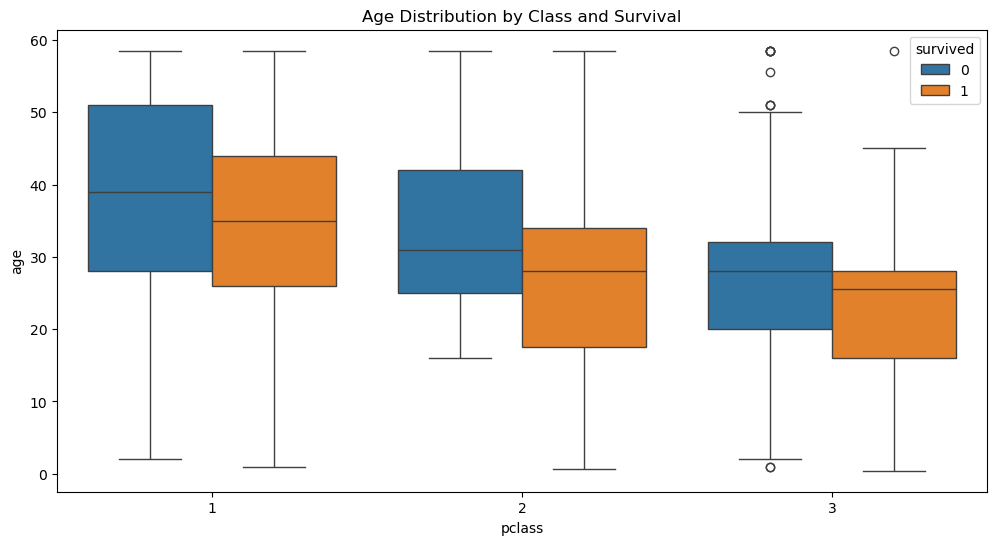

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='pclass', y='age', hue='survived', data=df)
plt.title('Age Distribution by Class and Survival')
plt.savefig('grouped_boxplot.png')

<Figure size 1200x600 with 0 Axes>

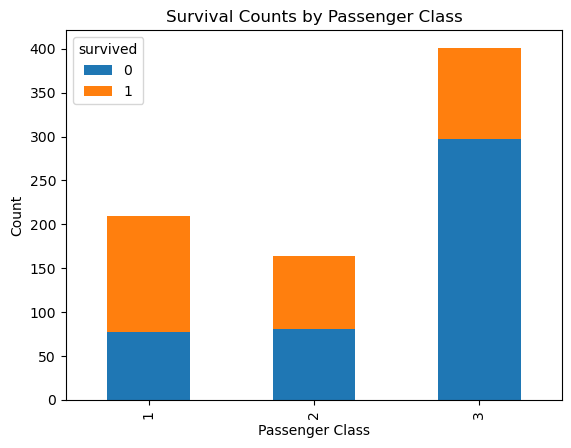

In [ ]:

plt.figure(figsize=(12, 6))
pd.crosstab(df['pclass'], df['survived']).plot(kind='bar', stacked=True)
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.savefig('grouped_barchart.png')